In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter

In [3]:
EXCLUDE = ['151507', '151672','151673']
PATIENTS = [['151508', '151509', '151510'], ['151669', '151670', '151671'], ['151674', '151675', '151676']]

### Figure 1g

In [4]:
PALETTE_DICT = {
    'DR.SC': "#CADBE9",
    'SEDR': "#00AEEF",
    'BayesSpace': "#1C75BC",
    'STAGATE': "#2B3990",
    'CellCharter': "#ED1C24",
}

In [5]:
methods_joint = {
    'DR.SC': 'results/benchmarking/joint/ARI_DR-SC_svg2000_joint.csv',
    'SEDR': 'results/benchmarking/joint/ARI_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_gpu_joint.csv',
    'BayesSpace': 'results/benchmarking/joint/ARI_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group_joint.csv',
    'STAGATE': 'results/benchmarking/joint/ARI_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu_joint.csv',
    'CellCharter': 'results/benchmarking/joint/ARI_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu_joint.csv',
}
palette = []
for method in methods_joint.keys():
    for keyword, color in PALETTE_DICT.items():
        if keyword in method:
            palette.append(color)

In [6]:
df_list = []
for method, path in methods_joint.items():
    df = pd.read_csv(path, index_col=0)
    
    df.columns = np.arange(df.shape[1])
    df['Sample'] = np.stack(df.index.astype(str).str.split("_"))[:, 0]
    df = df[~df['Sample'].isin(EXCLUDE)]
    df['Method'] = [method]*df.shape[0]
    df = df.reset_index(drop=True)
    df_list.append(df)
df = pd.concat(df_list)

df = pd.melt(df, id_vars=['Sample', 'Method'], var_name='Run', value_name='ARI')

In [7]:
df_combined = df.groupby(['Sample', 'Method']).mean().reset_index()

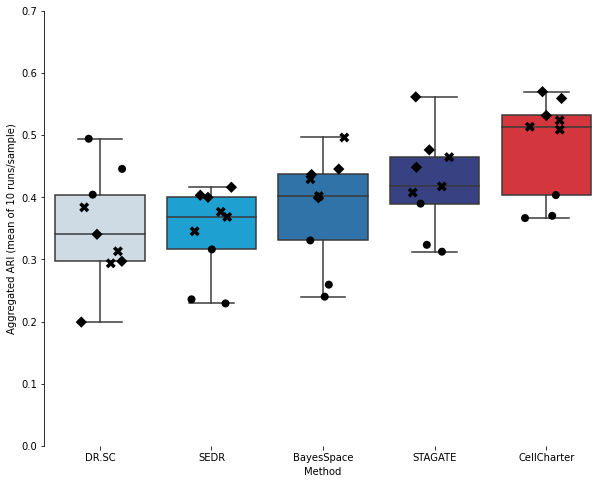

In [8]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df_combined, x='Method', y='ARI', order=list(methods_joint.keys()), showfliers = False, palette=palette)
for patient, marker in zip(PATIENTS, ['X', 'o', 'D']):
    size = 8
    if marker == 'X':
        size = 10
    ax = sns.stripplot(data=df_combined[df_combined['Sample'].isin(patient)], x='Method', y='ARI', color='black', s=size, order=list(methods_joint.keys()), dodge=True, marker=marker, ax=ax, jitter=0.2)

plt.ylim(0.0, 0.7)
plt.ylabel('Aggregated ARI (mean of 10 runs/sample)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Supplementary Figure 1c

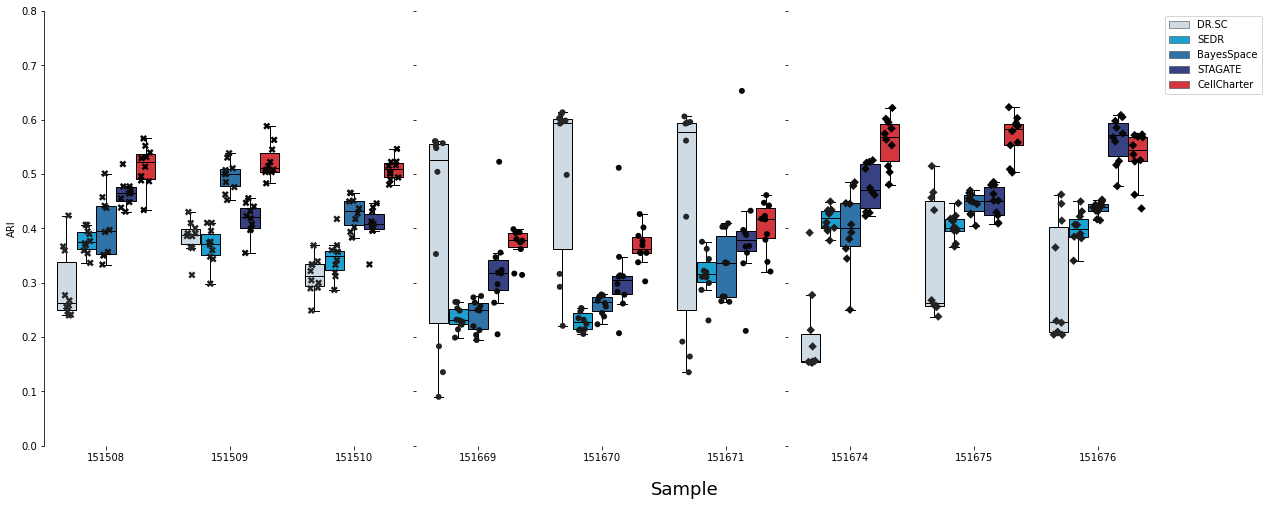

In [9]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0)
axs = gs.subplots(sharey=True)
for i, patient, marker in zip([0,1,2], PATIENTS, ['X', 'o', 'D']):
    size = 6
    if marker == 'X':
        size = 7
    axs[i] = sns.boxplot(data=df[df['Sample'].isin(patient)], x='Sample', y='ARI', hue='Method', showfliers = False, palette=palette, ax=axs[i],
                        linewidth=1,
                 boxprops={'edgecolor':'black'},
                 medianprops={'color':'black'},
                 whiskerprops={'color':'black'},
                 capprops={'color':'black'}
)
    axs[i] = sns.stripplot(data=df[df['Sample'].isin(patient)], x='Sample', y='ARI', hue='Method', color='black', dodge=True, s=size, marker=marker, ax=axs[i], jitter=0.2)
    
plt.ylim(0, 0.8)

axs[0].yaxis.set_ticks_position('left')

for ax in axs[1:]:
    ax.set_ylabel("")
    ax.spines['left'].set_visible(False)

for ax in axs:
    ax.get_legend().remove()
    ax.set_xlabel("")
    ax.grid(False)
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)

fig.text(0.57, 0.04, 'Sample', ha='center', fontsize=18)
handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles[0:len(methods_joint)], labels[0:len(methods_joint)],
            loc='upper left',bbox_to_anchor=(1, 1))


### Supplementary Figure 1b

In [10]:
PALETTE_DICT = {
    'DR.SC': "#CADBE9",
    'SEDR': "#00AEEF",
    'BayesSpace': "#1C75BC",
    'STAGATE': "#2B3990",
    'CellCharter': "#ED1C24",
}

In [11]:
methods_individual = {
    'DR.SC': 'results/benchmarking/individual/ARI_DR-SC_svg2000.csv',
    'SEDR': 'results/benchmarking/individual/ARI_SEDR_feat_hidden2_10_gcn_hidden2_16_pc100_gpu.csv',
    'BayesSpace': 'results/benchmarking/individual/ARI_BayesSpace_hvg1000_pc15_gamma3_nrep5000.csv',
    'STAGATE': 'results/benchmarking/individual/ARI_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu.csv',
    'CellCharter': 'results/benchmarking/individual/ARI_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu.csv'
}
palette = []
for method in methods_individual.keys():
    for keyword, color in PALETTE_DICT.items():
        if keyword in method:
            palette.append(color)

In [12]:
df_list = []
for method, path in methods_individual.items():
    df = pd.read_csv(path, index_col=0)

    df.columns = np.arange(df.shape[1])
    df['Sample'] = np.stack(df.index.astype(str).str.split("_"))[:, 0]
    df = df[~df['Sample'].isin(EXCLUDE)]
    df['Method'] = [method]*df.shape[0]
    df = df.reset_index(drop=True)
    df_list.append(df)
df = pd.concat(df_list)
df = pd.melt(df, id_vars=['Sample', 'Method'], var_name='Run', value_name='ARI')

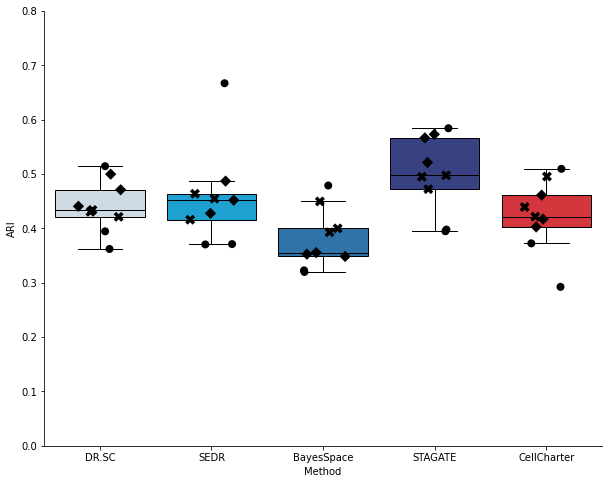

In [13]:
df_combined = df.groupby(['Sample', 'Method']).mean().reset_index()

plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df_combined, 
                 x='Method', 
                 y='ARI', 
                 order=list(methods_individual.keys()), 
                 showfliers = False, 
                 palette=palette,
                 linewidth=1,
                 boxprops={'edgecolor':'black'},
                 medianprops={'color':'black'},
                 whiskerprops={'color':'black'},
                 capprops={'color':'black'})
for patient, marker in zip(PATIENTS, ['X', 'o', 'D']):
    size = 8
    if marker == 'X':
        size = 10
    ax = sns.stripplot(data=df_combined[df_combined['Sample'].isin(patient)], x='Method', y='ARI', color='black',  s=size, order=list(methods_individual.keys()), dodge=True, marker=marker, ax=ax, jitter=0.2)
ax.grid(False)
plt.ylim(0.0, 0.8)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Figure 1h

In [14]:
PALETTE_DICT = {
    'SEDR (CPU)': "#00AEEF",
    'SEDR (GPU)': "#00AEEF",
    'BayesSpace': "#1C75BC",
    'STAGATE (CPU)': "#2B3990",
    'STAGATE (GPU)': "#2B3990",
    'CellCharter (GPU)': "#ED1C24",
    'CellCharter (CPU)': "#ED1C24",
}

In [15]:
methods_time = {
    'SEDR (CPU)': 'results/benchmarking/time/time_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_cpu_ncpus4.csv',
    'SEDR (GPU)': 'results/benchmarking/time/time_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_gpu_ncpus4.csv',

    'BayesSpace': 'results/benchmarking/time/time_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group_ncpus4.csv',

    'STAGATE (CPU)': 'results/benchmarking/time/time_STAGATE_hvgs5000_hidden_dim1024_nlatent30_cpu_ncpus4.csv',
    'STAGATE (GPU)': 'results/benchmarking/time/time_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu_ncpus4.csv',

    'CellCharter (CPU)': 'results/benchmarking/time/time_CellCharter_hvgs5000_nlatent5_nhoodlayers4_cpu_ncpus4.csv',
    'CellCharter (GPU)': 'results/benchmarking/time/time_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu_ncpus4.csv',
}

In [16]:
times = None
for method, path in methods_time.items():
    times_df = pd.read_csv(path, index_col=0)
    times_df['Time (min)'] = times_df[[col for col in times_df.columns if col != 'n_samples']].sum(axis=1) / 60
    times_df['Method'] = method
    times_df['N. samples'] = times_df['n_samples']
    times = pd.concat((times, times_df[['N. samples', 'Time (min)', 'Method']]), axis=0)

In [17]:
times_mean = times.groupby(['N. samples', 'Method']).mean().reset_index()
times_mean.index = times_mean[['N. samples', 'Method']]

In [18]:
methods_memory = {    
    'SEDR (CPU)': 'results/benchmarking/memory/memory_SEDR_feat_hidden2_10_gcn_hidden2_16_pc100_cpu.csv',
    'SEDR (GPU)': 'results/benchmarking/memory/memory_SEDR_feat_hidden2_10_gcn_hidden2_16_pc100_cpu.csv',
    
    'BayesSpace': 'results/benchmarking/memory/memory_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group.csv',
    
    'STAGATE (CPU)': 'results/benchmarking/memory/memory_STAGATE_hvgs5000hidden_dim1024_nlatent30_cpu.csv',
    'STAGATE (GPU)': 'results/benchmarking/memory/memory_STAGATE_hvgs5000hidden_dim1024_nlatent30_cpu.csv',
    
    'CellCharter (CPU)': 'results/benchmarking/memory/memory_CellCharter_hvgs5000_nlatent5_nhoodlayers4_cpu.csv',
    'CellCharter (GPU)': 'results/benchmarking/memory/memory_CellCharter_hvgs5000_nlatent5_nhoodlayers4_cpu.csv'
}

In [19]:
memory = None
for method, path in methods_memory.items():
    memory_df = pd.read_csv(path)
    memory_df.columns = ['N. samples', method]
    memory = memory.merge(memory_df, on='N. samples') if memory is not None else memory_df
memory = pd.melt(memory, id_vars='N. samples', var_name='Method', value_name='Memory (GB)')
memory['Memory (GB)'] /= 1000

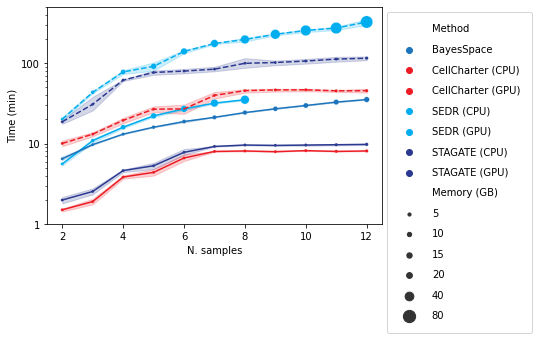

In [20]:
benchmark = times.merge(memory, left_on=['N. samples', 'Method'], right_on=['N. samples', 'Method'])

ax =sns.lineplot(data=benchmark, 
                x='N. samples', 
                y='Time (min)', 
                hue='Method',
                palette=PALETTE_DICT,
                 legend=False
)
ax = sns.scatterplot(data=times_mean.merge(memory, left_on=['N. samples', 'Method'], right_on=['N. samples', 'Method']), 
                x='N. samples', 
                y='Time (min)', 
                size='Memory (GB)', 
                hue='Method',
                size_norm=(5, 80),
                sizes=(10, 150),
                palette=PALETTE_DICT, legend='full')
def sizes_legend(desired_sizes, ax=None):
    ax = ax or plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    method_handles, size_handles = handles[:9], handles[9:]
    method_labels, size_labels = labels[:9], labels[9:]
    size_labels = np.array([float(l) for l in size_labels])
    desired_handles = [size_handles[np.argmin(np.abs(size_labels - d))] for d in desired_sizes]
    ax.legend(handles=method_handles+desired_handles, 
              labels=method_labels+desired_sizes, 
              title=ax.legend_.get_title().get_text(), 
              loc='upper left', 
              bbox_to_anchor=(1, 1),
              labelspacing=1.05,
              handletextpad=1.3, 
              borderpad=1.2
             )
sizes_legend([5, 10, 15, 20, 40, 80], ax)

for i, name in enumerate(methods_memory.keys()):
    if 'CPU' in name:
        ax.lines[i].set_linestyle('--')

plt.grid(False)
plt.yscale('log')
plt.ylim(1, 500)
ax.yaxis.set_major_formatter(ScalarFormatter())

### Supplementary Figure 1d

In [21]:
def unify_cols(df):
    df = df.rename(columns={
        'aggregate_neighbors': 'Spatial embedding',
        'spatial_embedding': 'Spatial embedding'
    })

    df['Dimensionality reduction'] = df['load_data'] + df['preprocess'] + df['scvi']
    df['Clustering'] = df['cluster']
    df[['Dimensionality reduction', 'Spatial embedding', 'Clustering']] /= 60
    return df

In [22]:
times = None
for method in ['STAGATE (CPU)', 'CellCharter (CPU)']:
    path = methods_time[method]
    times_method = pd.read_csv(path, index_col=0)
    times_method[[col for col in times_method.columns if col != 'n_samples']]
    times_method['Method'] = method
    times_method['N. samples'] = times_method['n_samples']
    times_method = unify_cols(times_method)
    
    times = pd.concat((times, times_method), axis=0)

In [23]:
times = times[times['N. samples'] == 12].groupby('Method').mean()

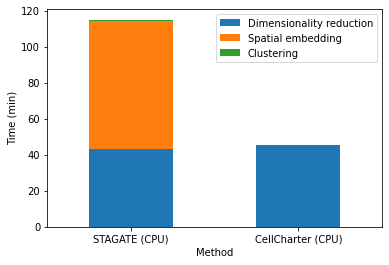

In [24]:
times.loc[['STAGATE (CPU)', 'CellCharter (CPU)'], ['Dimensionality reduction', 'Spatial embedding', 'Clustering']].plot.bar(stacked=True)
plt.ylabel('Time (min)')
plt.xticks(rotation=0)
plt.show()